<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-17 01:09:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.3MB/s    in 2.6s    

2025-01-17 01:09:35 (59.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [14]:
!pip install numpy
import numpy as np

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



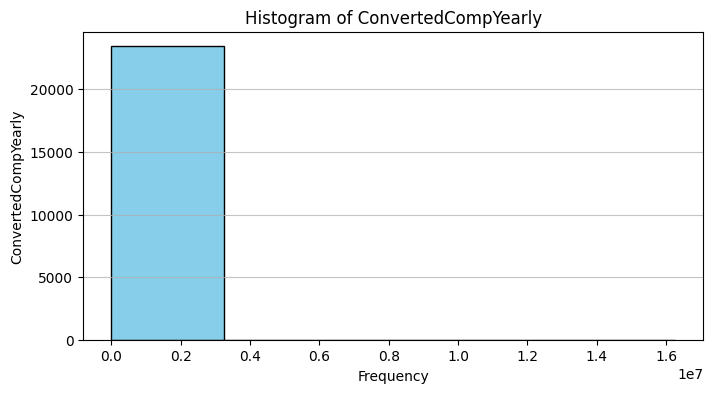

In [5]:
## Write your code here
plt.figure(figsize=(8, 4))
plt.hist(df['ConvertedCompYearly'], bins=5, edgecolor='black', color='skyblue')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('Frequency')
plt.ylabel('ConvertedCompYearly')
plt.grid(axis='y', alpha=0.75)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [6]:
!pip install seaborn
import seaborn as sns

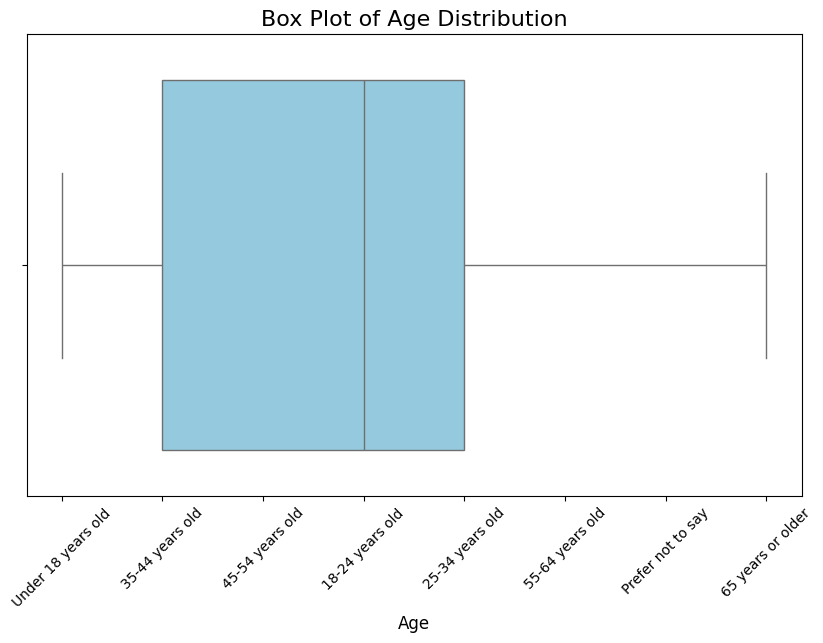

In [7]:
## Write your code here
# Transform Age column (Example: Mapping age ranges to midpoints)
age_map = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70
}
df['Age_transformed'] = df['Age'].map(age_map)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='skyblue')

# Adding labels and title
plt.title('Box Plot of Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()


### Task 2: Visualizing Relationships in Data


In [12]:
headers = df.columns.tolist()
print(headers)

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [15]:
AgeRange = df['Age'].unique().tolist()
print(AgeRange)
age_counts = df['Age'].value_counts()

data = { 'AgeRange': ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years old', 'Prefer not to say'],
         'Counts': [2568, 14098, 23911, 14942, 6249, 2575, 772, 322]}
df1 = pd.DataFrame(data)
# Function to generate a random age within the specified range
def generate_random_age(age_range): 
    if age_range == 'Under 18 years old': 
        return np.random.randint(15, 18)
    elif age_range == '18-24 years old':
        return np.random.randint(18, 25)
    elif age_range == '25-34 years old':
        return np.random.randint(25, 35)
    elif age_range == '35-44 years old':
        return np.random.randint(35, 45)
    elif age_range == '45-54 years old':
        return np.random.randint(45, 55)
    elif age_range == '55-64 years old':
        return np.random.randint(55, 65)
    elif age_range == '65 years or older':
        return np.random.randint(65, 101)    # Assuming 100 as the upper limit for simplicity
    elif age_range == 'Prefer not to say':
        return None
    else: 
        start_age, end_age = map(int, age_range.split('-'))
        return np.random.randint(start_age, end_age + 1)
        

# Apply the function to the AgeRange column to generate random ages
df['RandomAge'] = df['Age'].apply(generate_random_age)

# Display the DataFrame with the new RandomAge column
print(df['RandomAge'])

['Under 18 years old', '35-44 years old', '45-54 years old', '18-24 years old', '25-34 years old', '55-64 years old', 'Prefer not to say', '65 years or older']
0        16.0
1        37.0
2        49.0
3        24.0
4        20.0
         ... 
65432    24.0
65433    29.0
65434    27.0
65435    20.0
65436    19.0
Name: RandomAge, Length: 65437, dtype: float64


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



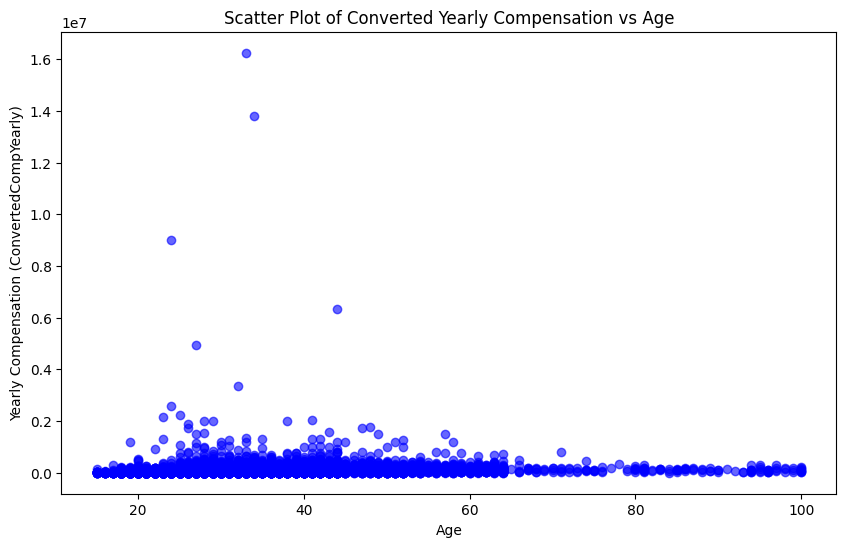

In [17]:
## Write your code here
df1 = df.copy()
df1 = df1.dropna(subset=['ConvertedCompYearly', 'RandomAge'])

                 # Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1['RandomAge'], df1['ConvertedCompYearly'],  alpha=0.6, c='blue')

# Add labels and title
plt.title('Scatter Plot of Converted Yearly Compensation vs Age')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')

# Show plot
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


Expanded DataFrame for Scatter Plot:
         Age  JobSatPoints_6  ConvertedCompYearly
0      17.0             NaN                  NaN
1      39.5             0.0                  NaN
2      49.5             NaN                  NaN
3      21.0             NaN                  NaN
4      21.0             NaN                  NaN
...     ...             ...                  ...
65110  21.0             NaN                  NaN
65111  29.5             NaN                  NaN
65112  29.5             NaN                  NaN
65113  21.0             0.0                  NaN
65114  21.0             NaN                  NaN

[65115 rows x 3 columns]


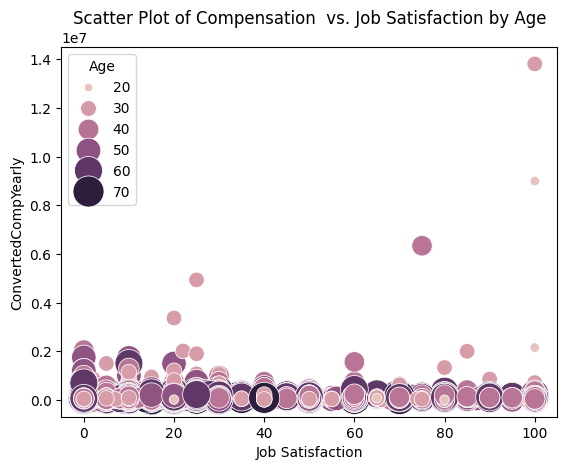

In [18]:
## Write your code here
##Write your code here
# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
job_satisfaction = []
converted_comp = []
for _, row in df.iterrows():
    age_range = row['Age']
    if age_range in age_mapping and age_mapping[age_range] and df['JobSatPoints_6'] is not None:
        expanded_ages.append(age_mapping[age_range])
        job_satisfaction.append(row['JobSatPoints_6']) 
        converted_comp.append(row['ConvertedCompYearly'])

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'JobSatPoints_6': job_satisfaction, 'ConvertedCompYearly': converted_comp})
sns.scatterplot(
    x='JobSatPoints_6', 
    y='ConvertedCompYearly', 
    data=expanded_df, 
    size='Age',
    hue='Age',
    sizes=(10, 500)
)
print("Expanded DataFrame for Scatter Plot:\n", expanded_df)

# Create the scatter plot
# plt.figure(figsize=(10, 6))

plt.title('Scatter Plot of Compensation  vs. Job Satisfaction by Age')
plt.xlabel('Job Satisfaction')
plt.ylabel('ConvertedCompYearly')
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



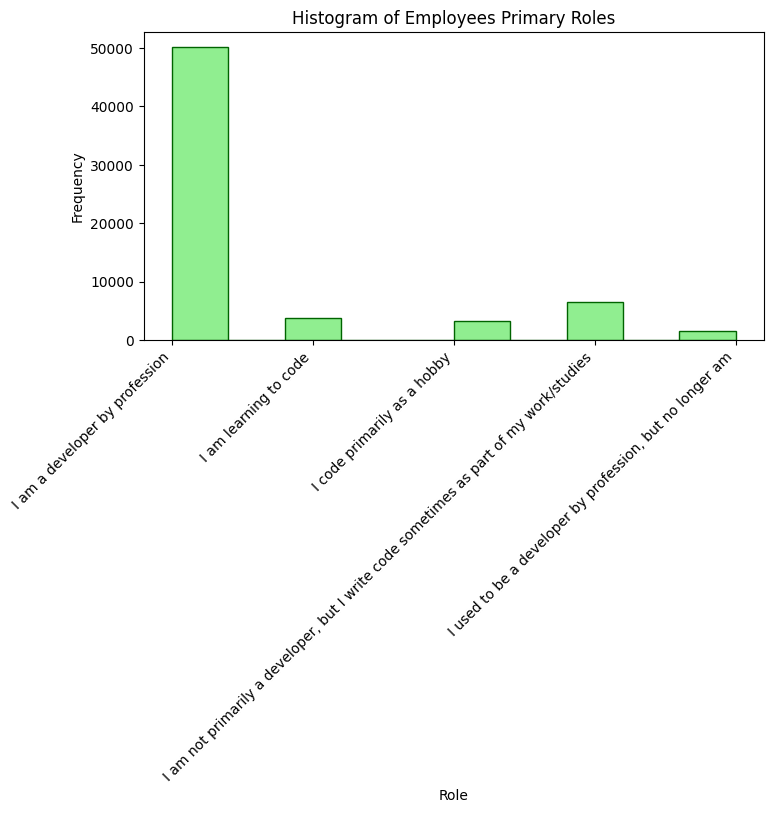

In [23]:
## Write your code here
plt.figure(figsize=(8, 4))
plt.hist(df['MainBranch'], color='lightgreen', edgecolor='darkgreen')
plt.title('Histogram of Employees Primary Roles')
plt.xlabel('Role')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [29]:
lang = df['LanguageWantToWorkWith'].value_counts().head()

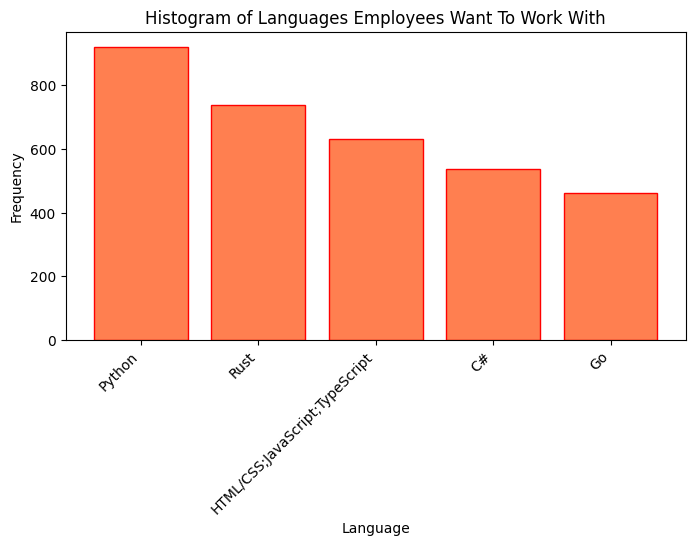

In [31]:
## Write your code here
## Write your code here
lang = df['LanguageWantToWorkWith'].value_counts().head()
plt.figure(figsize=(8, 4))
plt.bar(lang.index, lang.values, color='coral', edgecolor='red')
plt.title('Histogram of Languages Employees Want To Work With')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


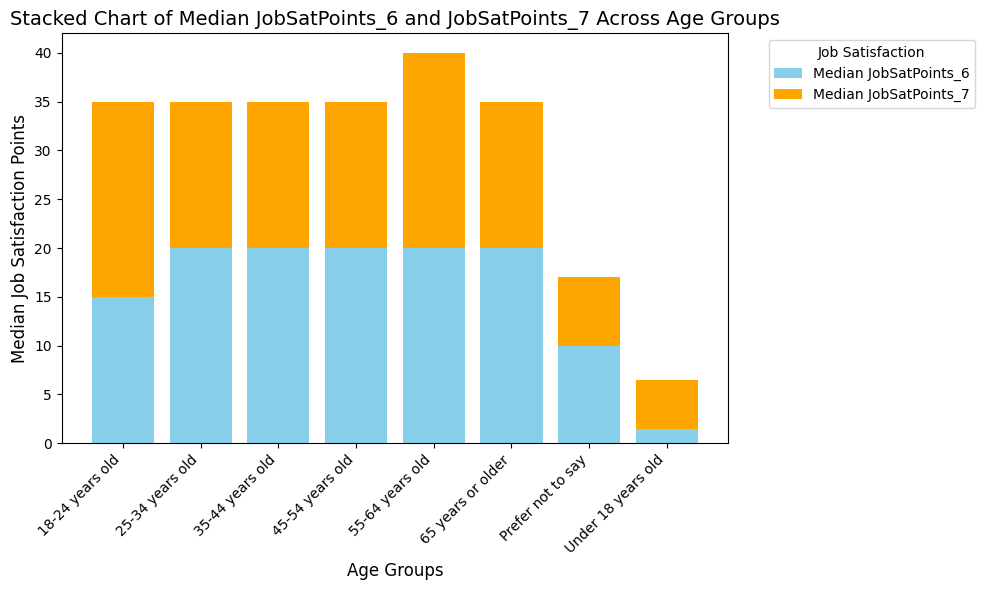

In [32]:
## Write your code here
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Exclude this category
}

# Replace age ranges with numerical midpoints
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Take care of NaN values by replacing with the mean value
# df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(df['JobSatPoints_6'].mean())
# df['JobSatPoints_7'] = df['JobSatPoints_7'].fillna(df['JobSatPoints_7'].mean())
df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'], axis=0, inplace=True)
# Group by age ranges and calculate the median
median_df = df.groupby('Age').median(numeric_only=True).reset_index()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars
ax.bar(median_df['Age'], median_df['JobSatPoints_6'], label='Median JobSatPoints_6', color='skyblue')
ax.bar(median_df['Age'], median_df['JobSatPoints_7'], bottom=median_df['JobSatPoints_6'], label='Median JobSatPoints_7', color='orange')

# Add labels and title
ax.set_xlabel('Age Groups', fontsize=12)
ax.set_ylabel('Median Job Satisfaction Points', fontsize=12)
ax.set_title('Stacked Chart of Median JobSatPoints_6 and JobSatPoints_7 Across Age Groups', fontsize=14)
ax.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Satisfaction')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



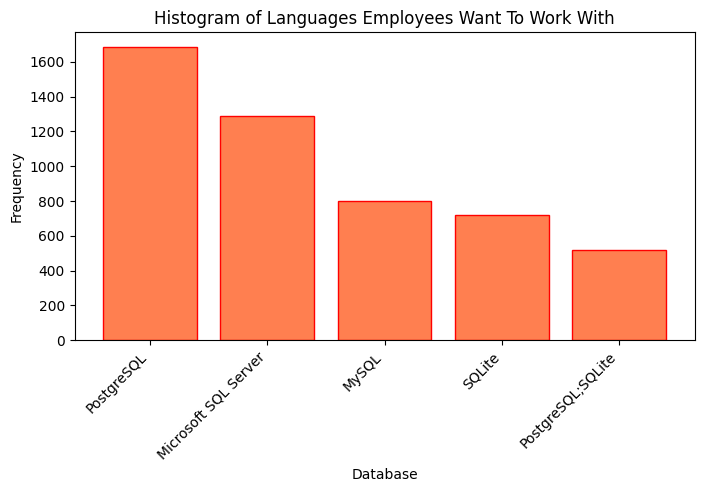

In [33]:
## Write your code here
db = df['DatabaseHaveWorkedWith'].value_counts().head()
plt.figure(figsize=(8, 4))
plt.bar(db.index, db.values, color='coral', edgecolor='red')
plt.title('Histogram of Languages Employees Want To Work With')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



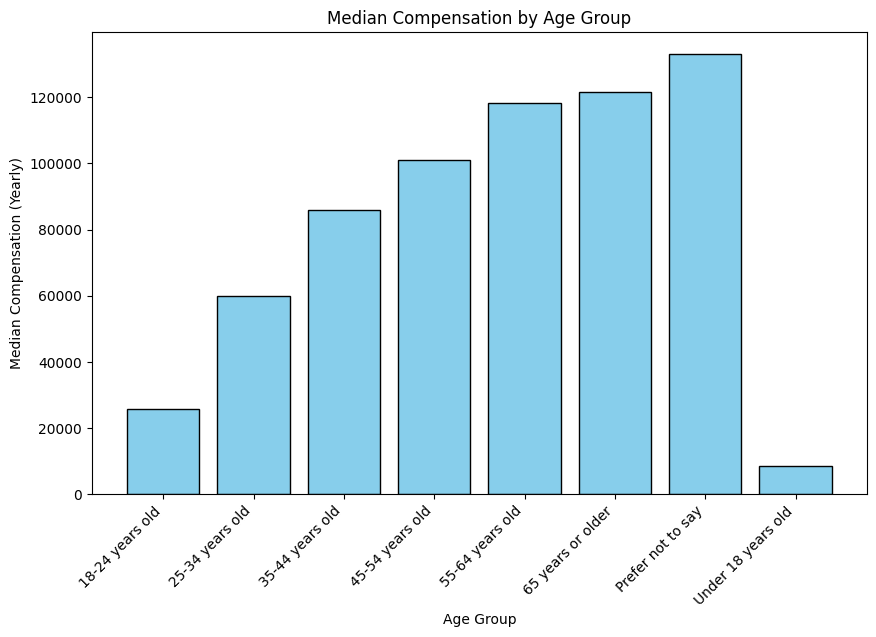

In [34]:
## Write your code here
# Group by AgeGroup and calculate the median compensation
median_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()
# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_compensation['Age'], median_compensation['ConvertedCompYearly'], color='skyblue', edgecolor='black')
plt.title('Median Compensation by Age Group')
plt.xlabel('Age Group') 
plt.ylabel('Median Compensation (Yearly)')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [40]:
country = df['Country'].value_counts().head(10)
print(country)

Country
United States of America                                5574
Germany                                                 2627
India                                                   2039
United Kingdom of Great Britain and Northern Ireland    1616
Ukraine                                                 1241
Canada                                                  1015
France                                                   971
Brazil                                                   804
Poland                                                   804
Netherlands                                              692
Name: count, dtype: int64


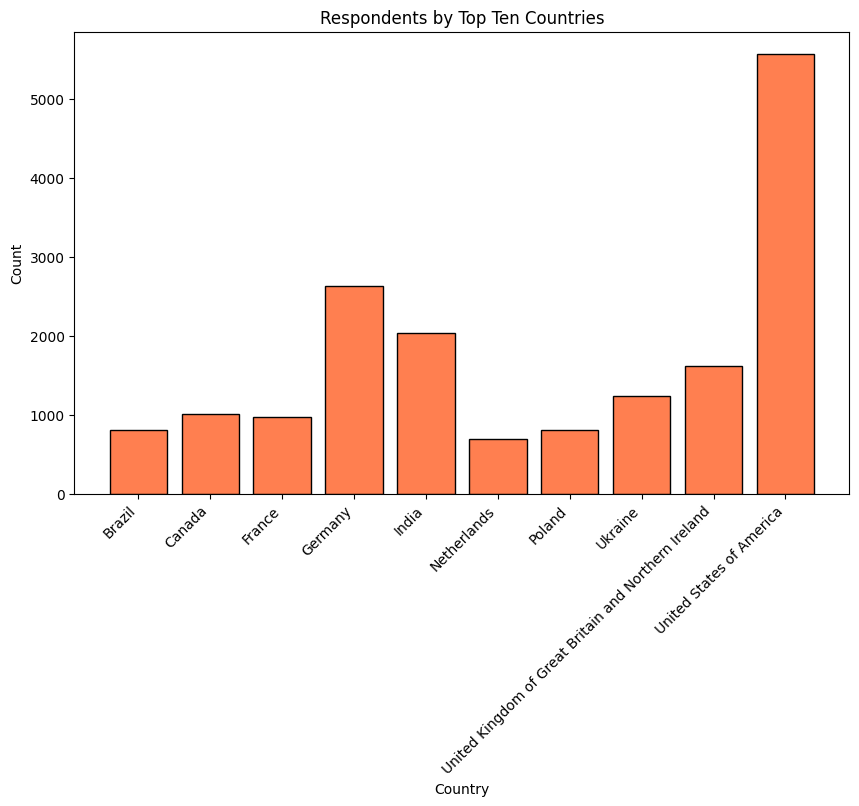

In [44]:
# Get the top 10 countries by count
top_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame for only the top 10 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Group by Country and count the number of responses
respondents_by_country = df_top_countries.groupby('Country')['ResponseId'].count().reset_index()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(respondents_by_country['Country'], respondents_by_country['ResponseId'], color='coral', edgecolor='black')
plt.title('Respondents by Top Ten Countries')
plt.xlabel('Country') 
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [45]:
df.to_csv('survey_data3.csv', index=False)

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
